In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
# Load data

train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')

In [4]:
print(test.head())
print(train.head())

      id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportatio

In [6]:
# Merge train and test datasets, so easy for process them together

merge_data = pd.concat([train,test])

merge_data.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [7]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34598 entries, 0 to 13839
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34598 non-null  int64  
 1   Gender                          34598 non-null  object 
 2   Age                             34598 non-null  float64
 3   Height                          34598 non-null  float64
 4   Weight                          34598 non-null  float64
 5   family_history_with_overweight  34598 non-null  object 
 6   FAVC                            34598 non-null  object 
 7   FCVC                            34598 non-null  float64
 8   NCP                             34598 non-null  float64
 9   CAEC                            34598 non-null  object 
 10  SMOKE                           34598 non-null  object 
 11  CH2O                            34598 non-null  float64
 12  SCC                             34598

In [8]:
merge_data.describe().T

count          mean          std    min          25%           50%  \
id      34598.0  17298.500000  9987.726643   0.00  8649.250000  17298.500000   
Age     34598.0     23.886181     5.733207  14.00    20.000000     22.851747   
Height  34598.0      1.699721     0.087895   1.45     1.631856      1.700000   
Weight  34598.0     87.686451    26.273493  39.00    66.000000     84.000000   
FCVC    34598.0      2.444704     0.532568   1.00     2.000000      2.392179   
NCP     34598.0      2.757043     0.707610   1.00     3.000000      3.000000   
CH2O    34598.0      2.030469     0.609566   1.00     1.784710      2.000000   
FAF     34598.0      0.978861     0.839122   0.00     0.006892      1.000000   
TUE     34598.0      0.614467     0.604475   0.00     0.000000      0.555591   

                 75%           max  
id      25947.750000  34597.000000  
Age        26.000000     61.000000  
Height      1.761773      1.980000  
Weight    111.539494    165.057269  
FCVC        3.000000      3.000000  
NCP         3.000000      4.000000  
CH2O        2.550570      3.000000  
FAF         1.583832      3.000000  
TUE         1.000000      2.000000

In [10]:
merge_data.isnull().sum()

id                                    0
Gender                                0
Age                                   0
Height                                0
Weight                                0
family_history_with_overweight        0
FAVC                                  0
FCVC                                  0
NCP                                   0
CAEC                                  0
SMOKE                                 0
CH2O                                  0
SCC                                   0
FAF                                   0
TUE                                   0
CALC                                  0
MTRANS                                0
NObeyesdad                        13840
dtype: int64

In [11]:
merge_data.drop('id',axis=1,inplace=True) 

merge_data.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

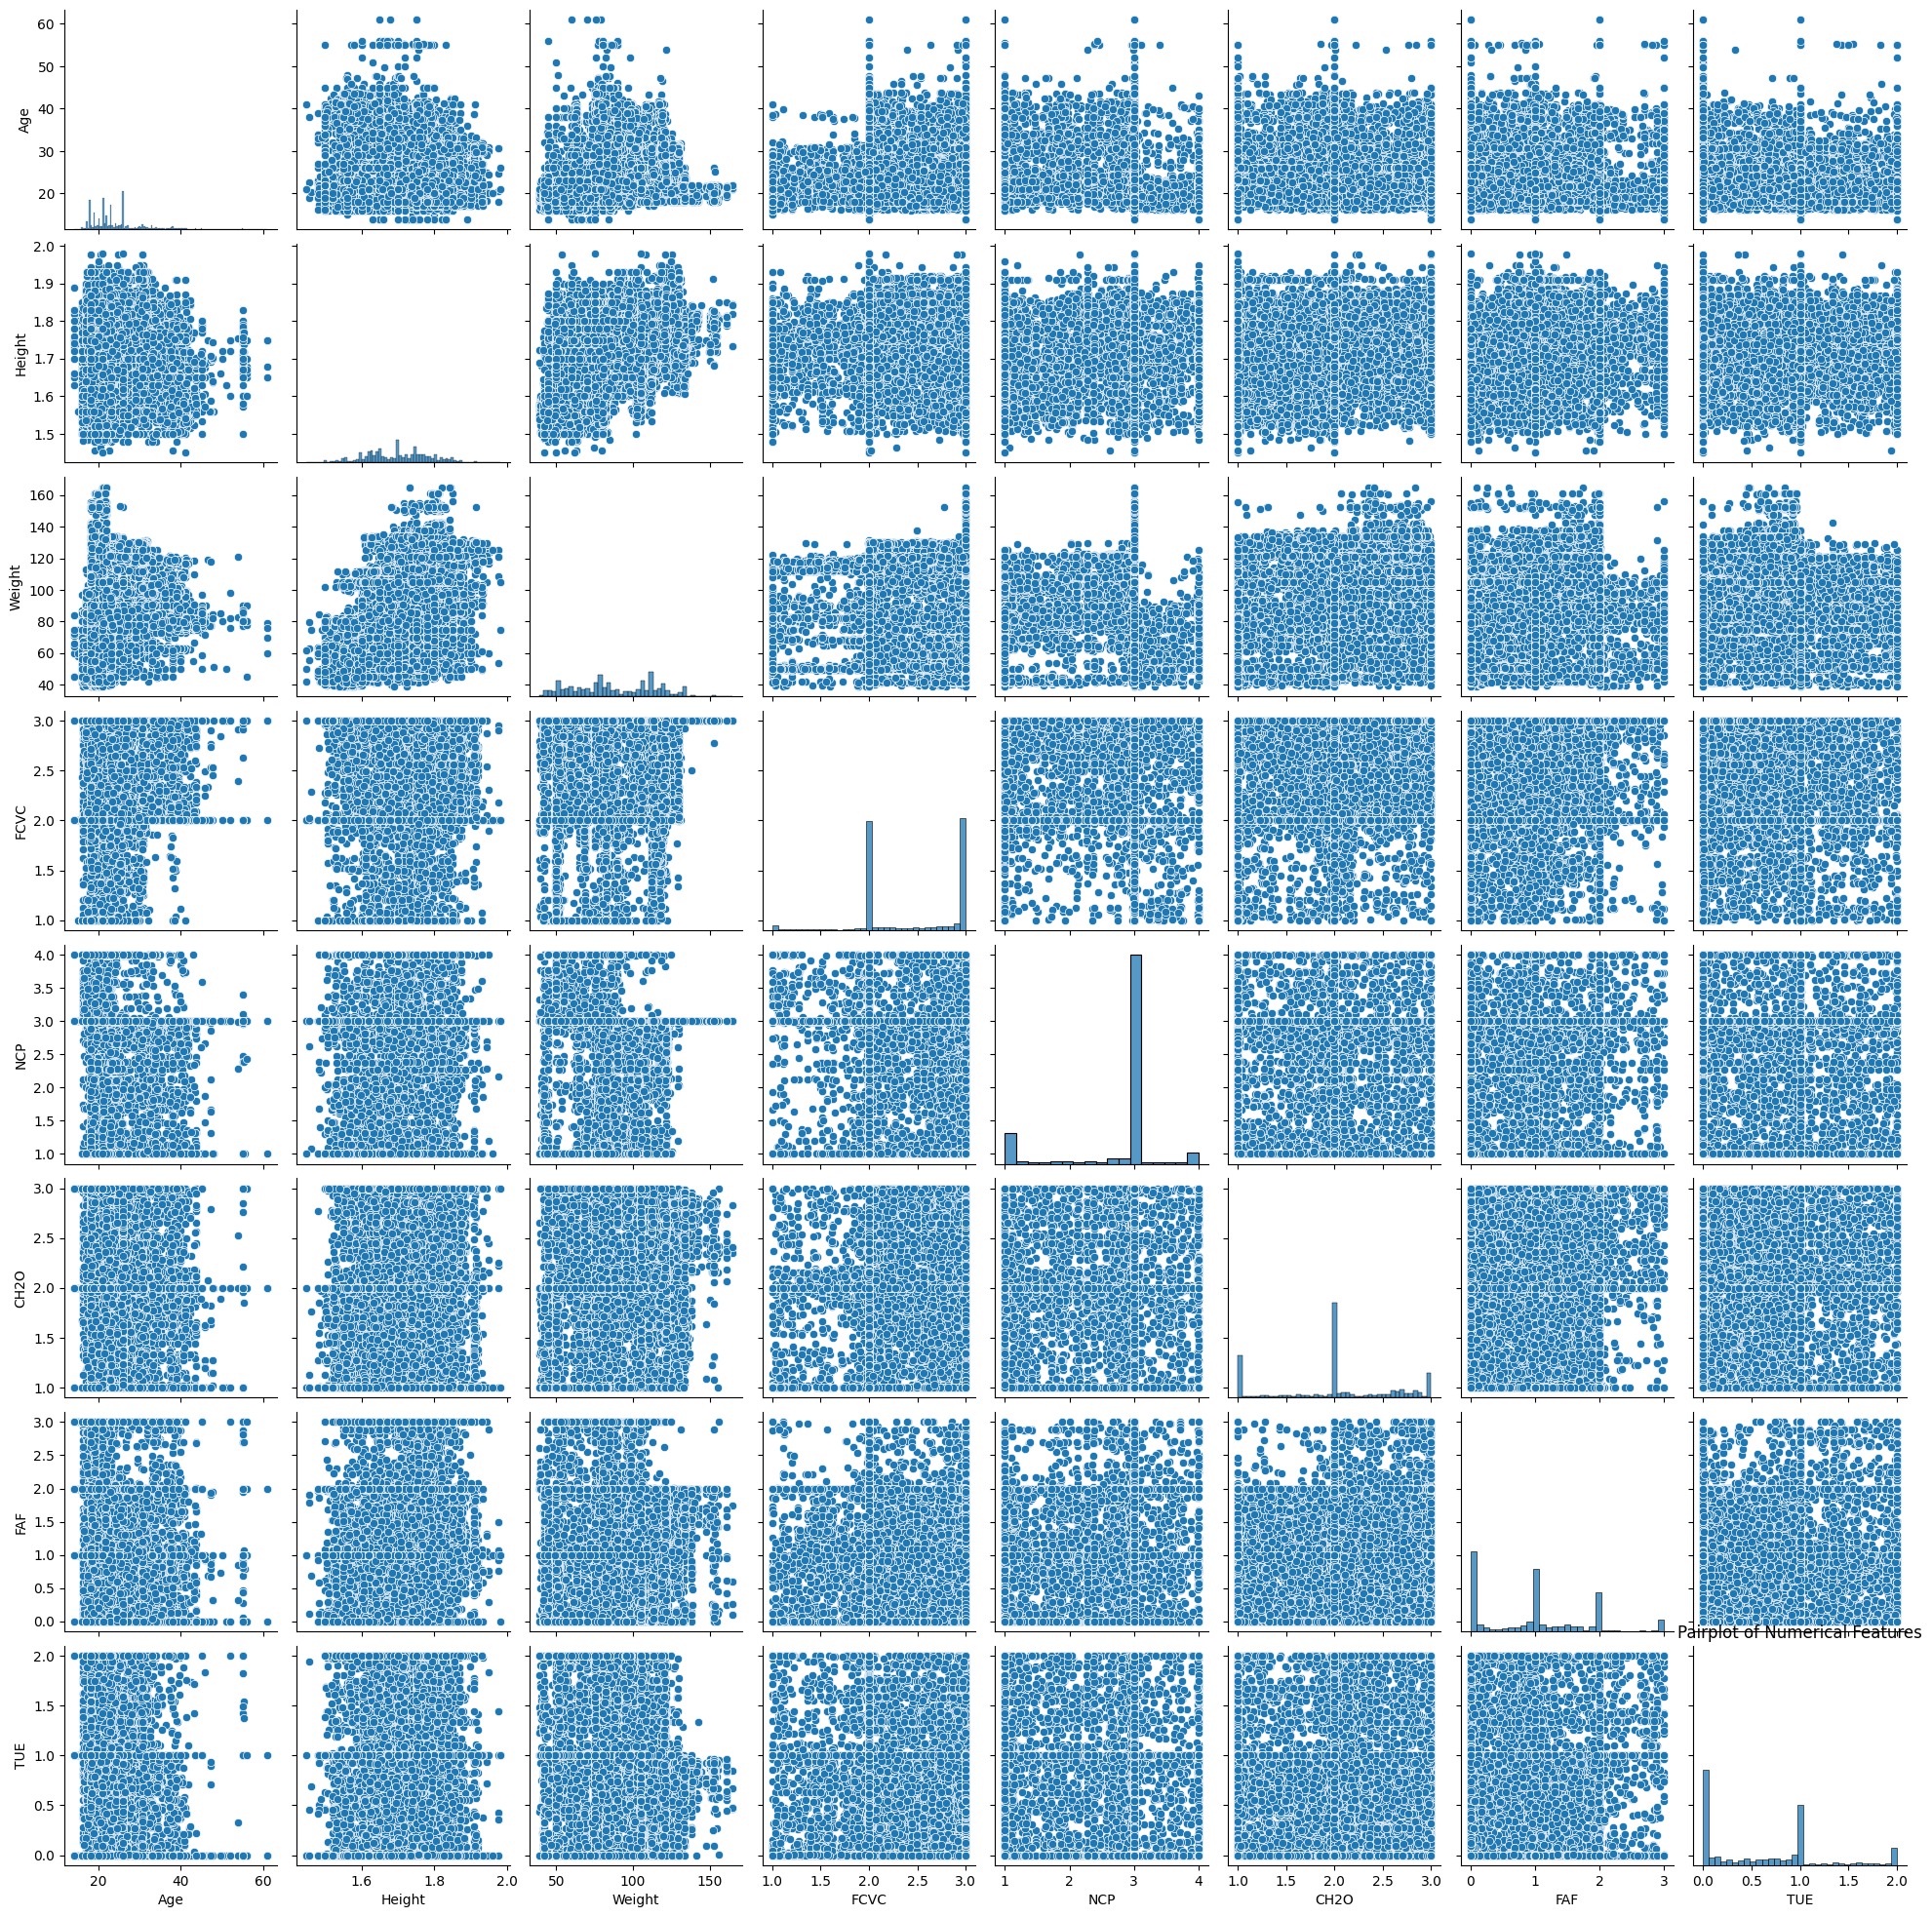

In [13]:
#Distribution of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
sns.pairplot(merge_data[numeric_features])
plt.title('Pairplot of Numerical Features')
plt.show()

Text(0.5, 1.0, 'Age Vs Obesity')

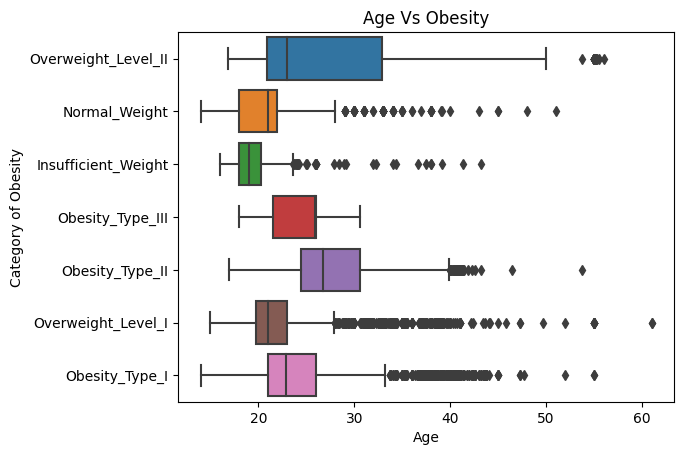

In [14]:
sns.boxplot(merge_data, x='Age', y='NObeyesdad')
plt.ylabel('Category of Obesity')
plt.title('Age Vs Obesity')

Text(0.5, 1.0, 'Height with Obesity')

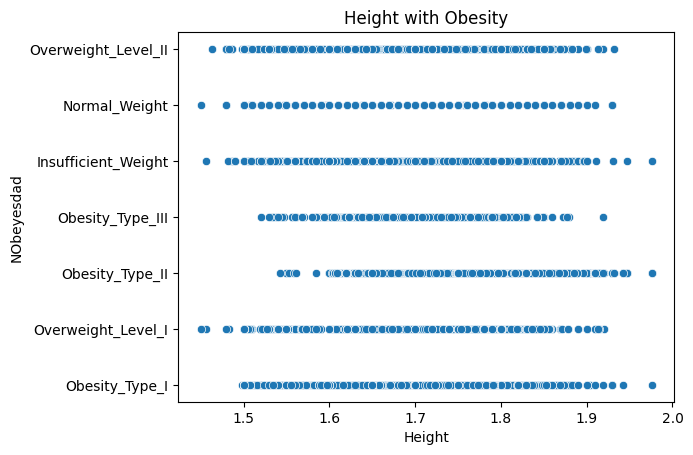

In [15]:
sns.scatterplot(merge_data, x='Height', y='NObeyesdad')
plt.title('Height with Obesity')

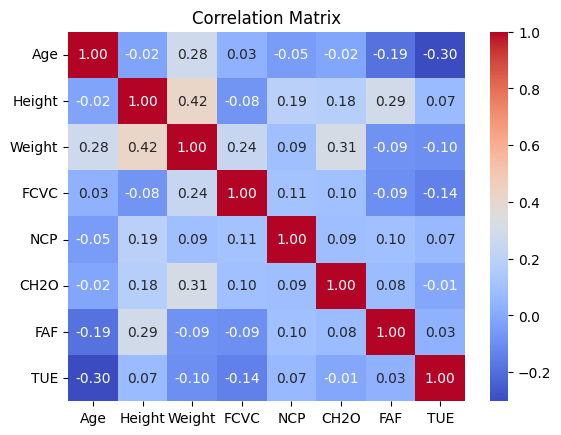

In [16]:
#Correlation Analysis
correlation_matrix = merge_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

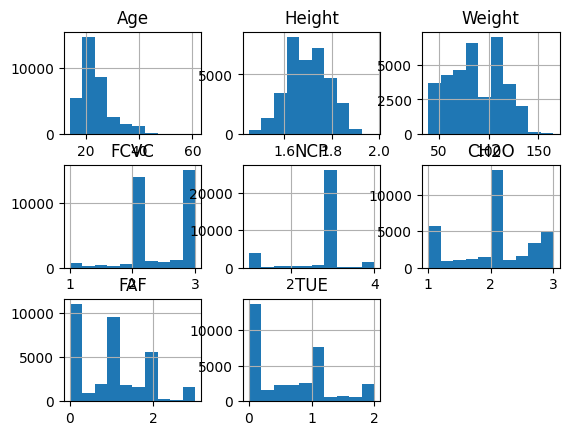

In [17]:
merge_data.hist()

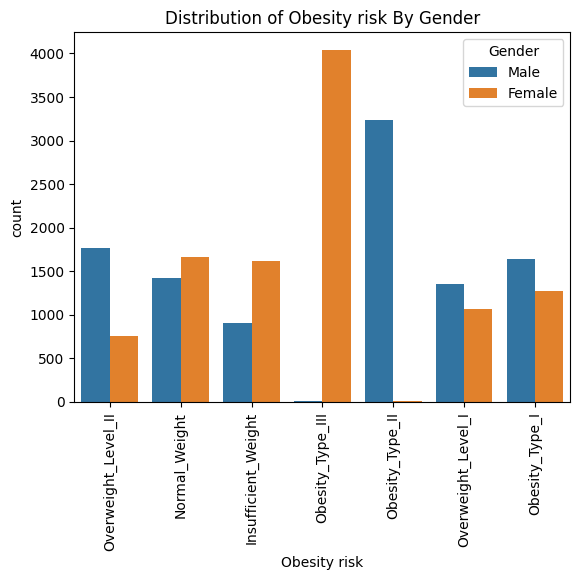

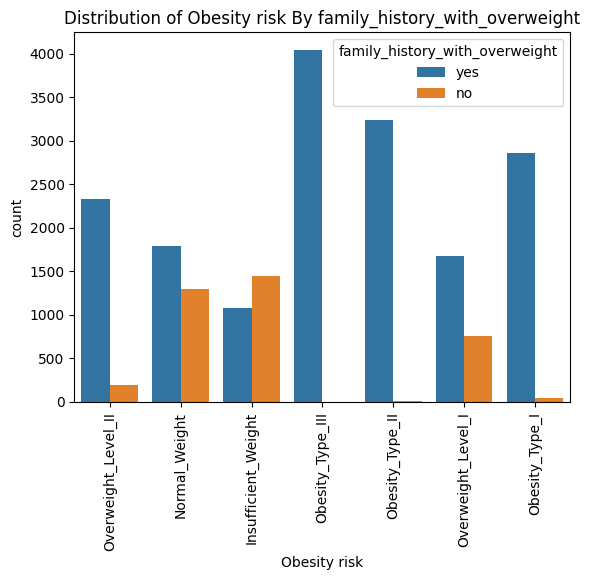

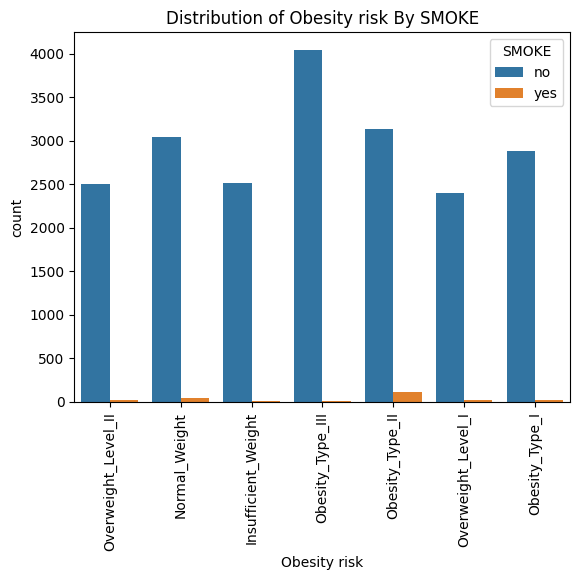

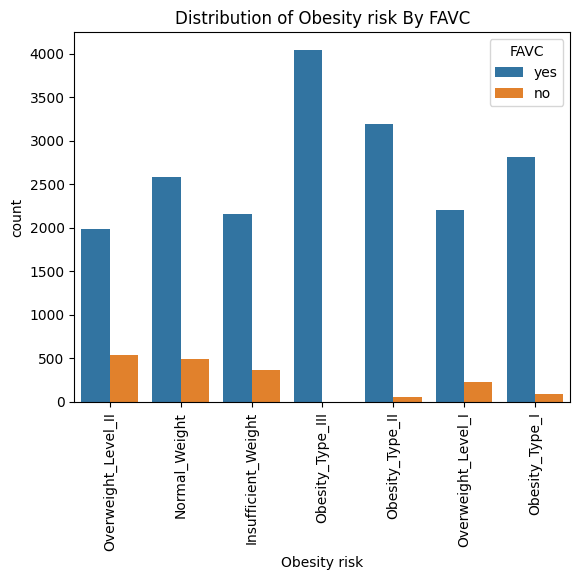

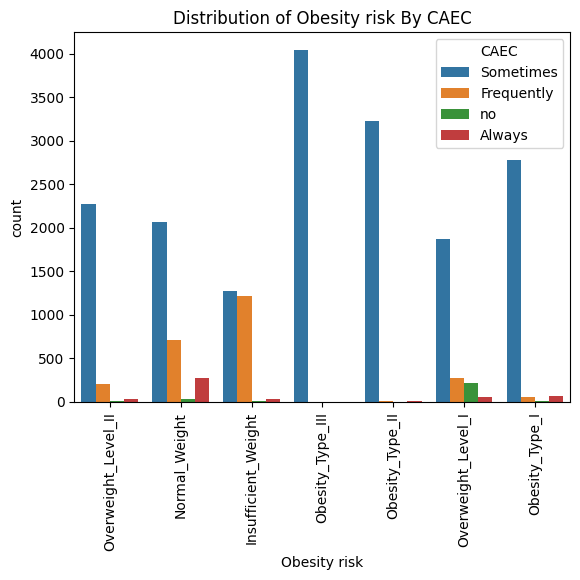

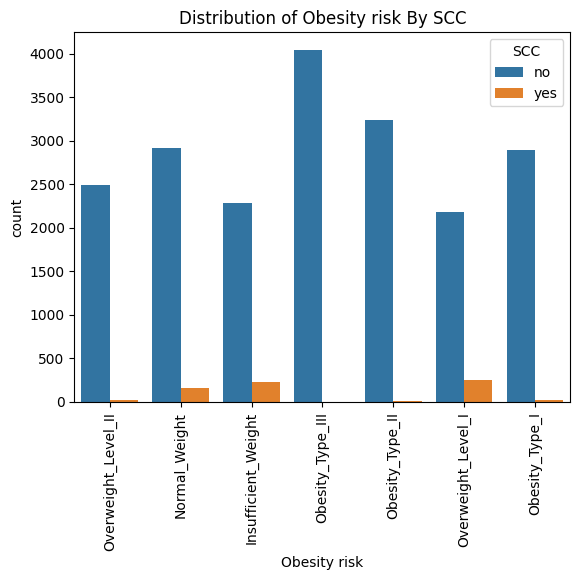

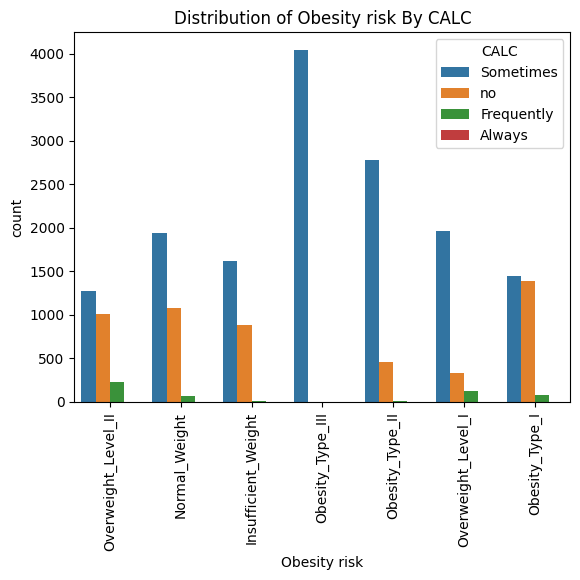

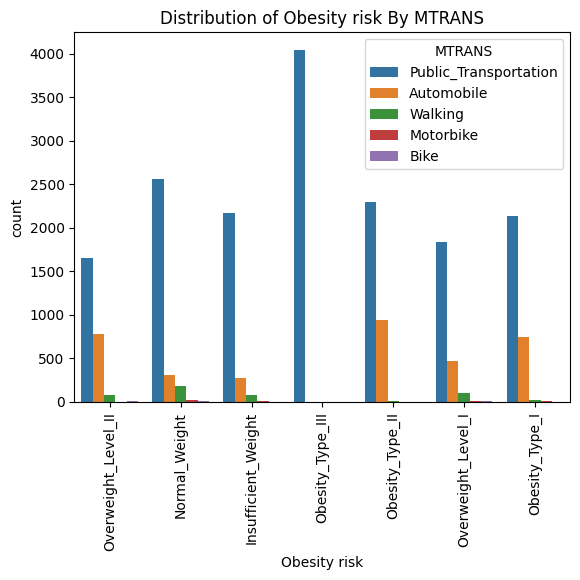

In [20]:
 #Create bar chart to see the distributions of Obesity risk in 'Categoric features' 

categoric_features = ['Gender','family_history_with_overweight','SMOKE','FAVC','CAEC','SCC','CALC','MTRANS']

for feature in categoric_features:
    sns.countplot(data=merge_data, x='NObeyesdad', hue=feature)
    
    # Add some text for labels, title 
    plt.xticks(rotation=90)
    plt.xlabel('Obesity risk')
    plt.title(f'Distribution of Obesity risk By {feature}')
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

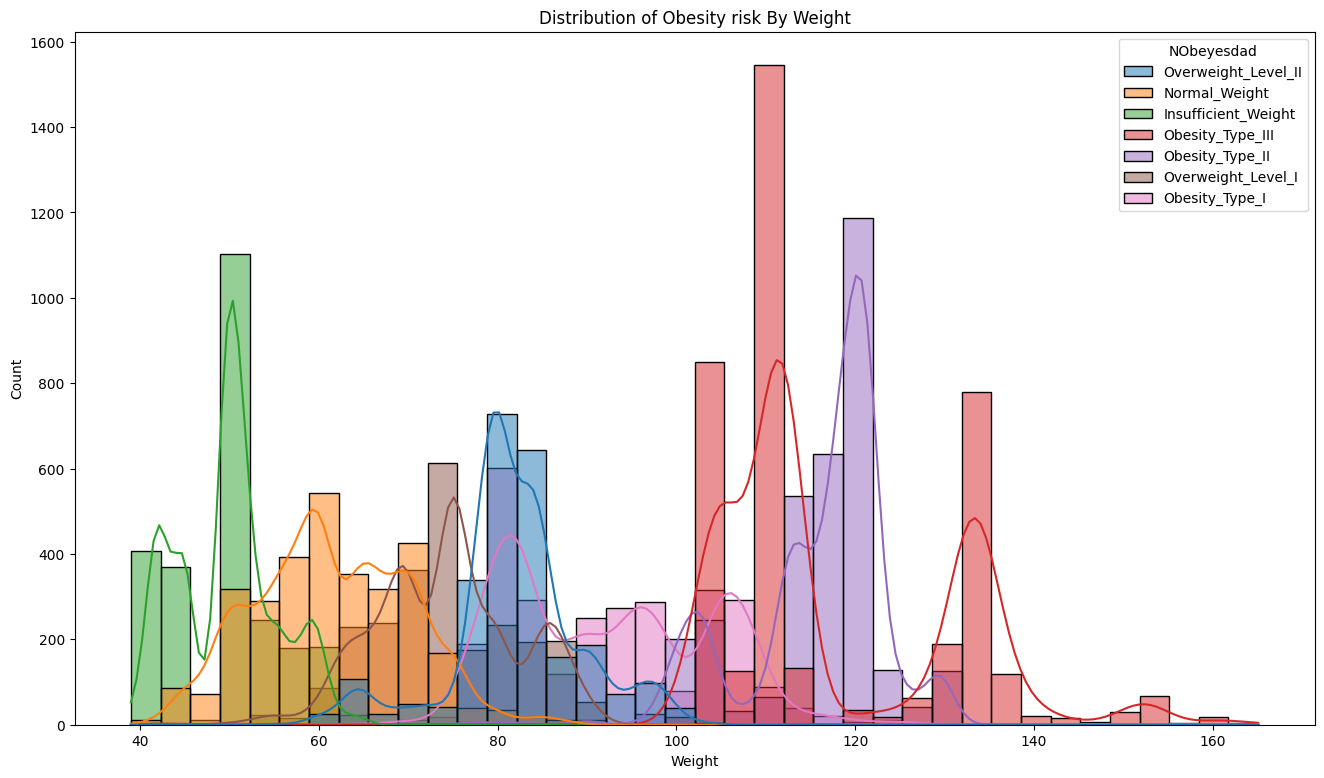

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

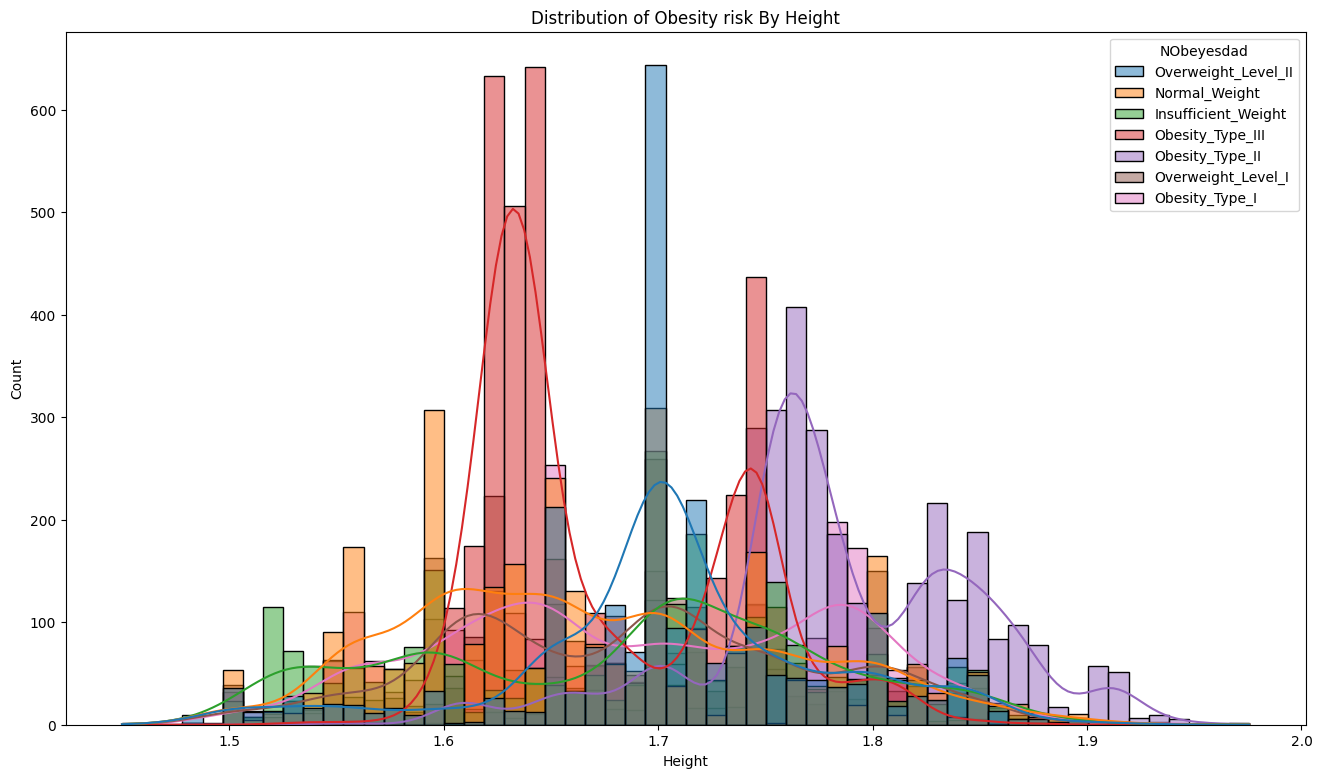

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

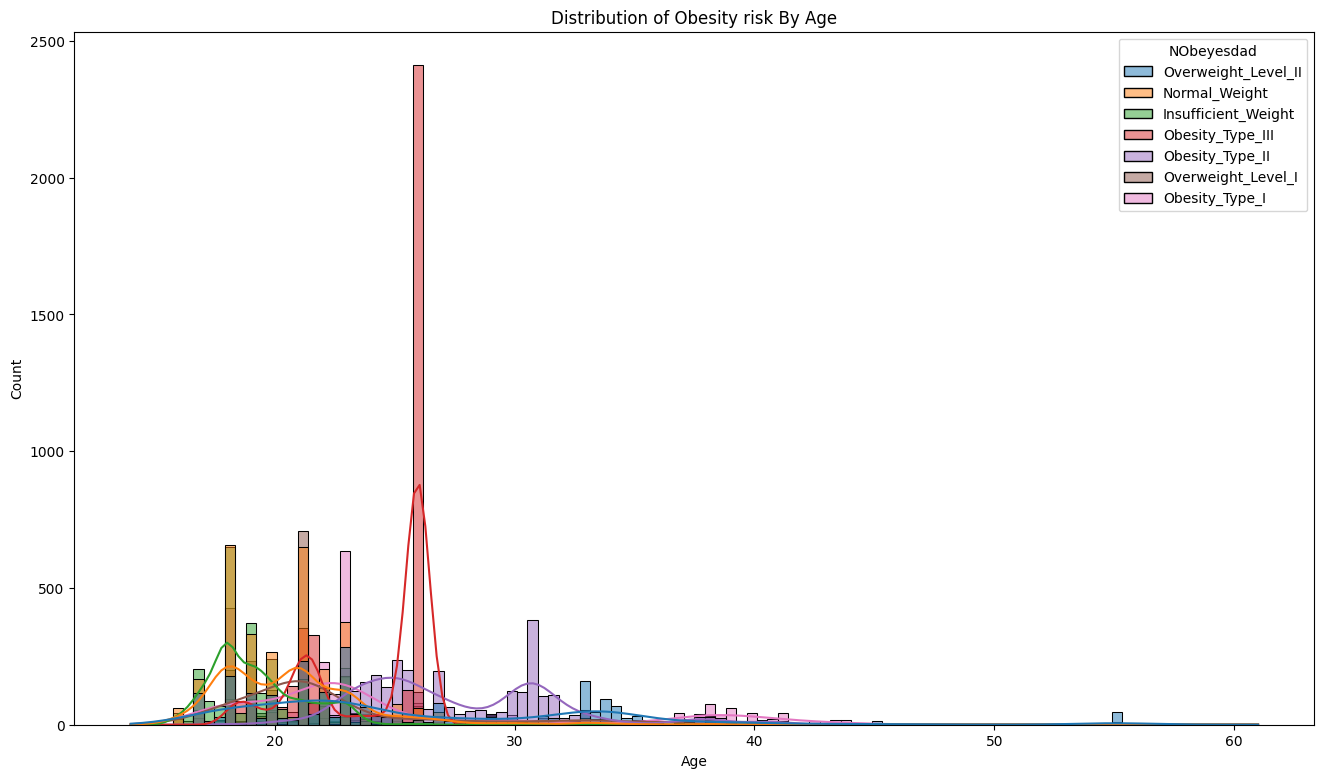

In [23]:
# Create histogram and kde to see the distributions of 'Age','Weight','Height' features

features = ['Weight','Height','Age']

for feature in features:
    plt.figure(figsize=(16,9))
    sns.histplot(data=merge_data, x=feature,hue='NObeyesdad', kde=True)
    plt.title(f'Distribution of Obesity risk By {feature}')
    plt.show()

In [25]:
# Create 'BMI' feature

merge_data['BMI'] = merge_data['Weight'] / (merge_data['Height'] ** 2)

all_data.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad        BMI  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  28.259565  
1  1.000000         no             Automobile        Normal_Weight  23.422091  
2  1.673584         no  Public_Transportation  Insufficient_Weight  17.126706  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  44.855798  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  25.599151

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Distribution of BMI by Obesity risk')

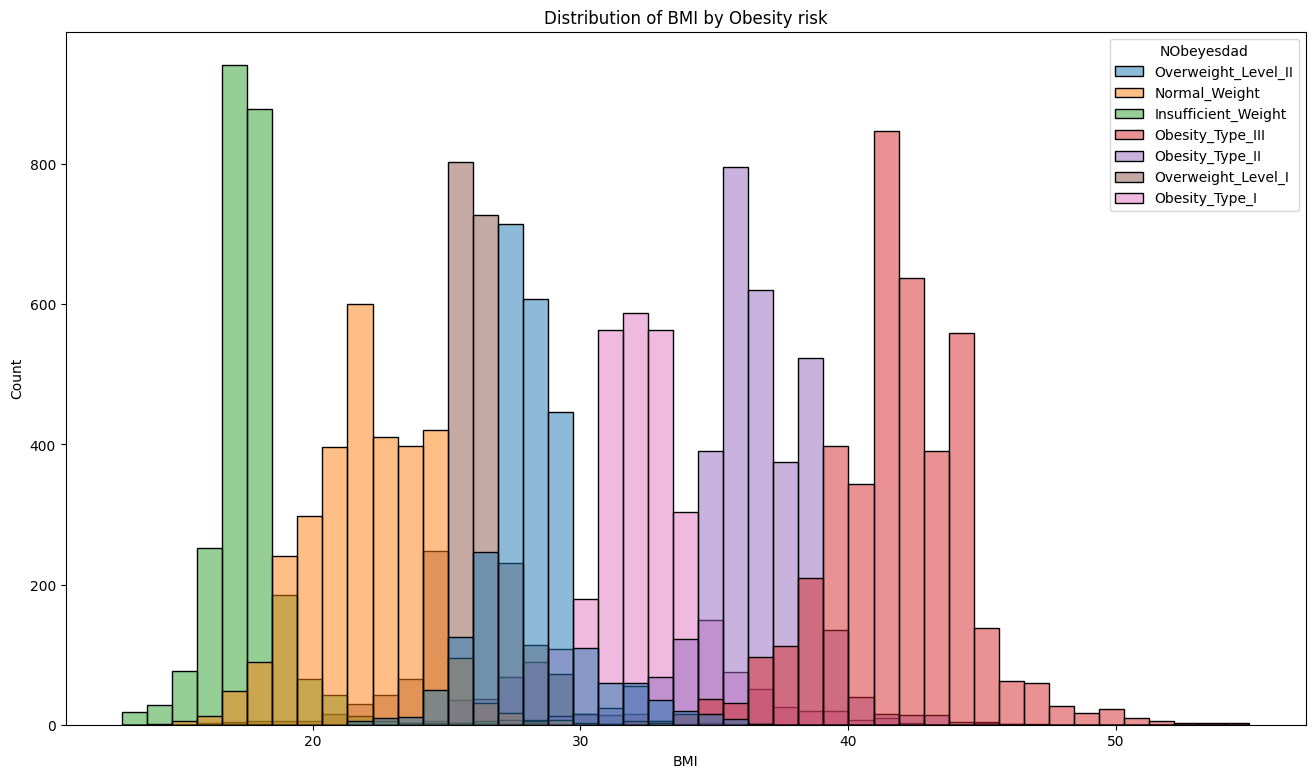

In [26]:
# Create histogram to see the distributions of Obesity risk By BMI

plt.figure(figsize=(16,9))

sns.histplot(data=merge_data,x='BMI', hue='NObeyesdad')

plt.title('Distribution of BMI by Obesity risk')

In [27]:
# Change the label of the target and make sure we can convert them back for submission

map_target = {'Insufficient_Weight': 0,
              'Normal_Weight': 1,
              'Overweight_Level_I': 2,
              'Overweight_Level_II': 3,
              'Obesity_Type_I': 4,
              'Obesity_Type_II': 5,
              'Obesity_Type_III': 6,
             }

merge_data['NObeyesdad'] = merge_data['NObeyesdad'].map(map_target)

merge_data.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS  NObeyesdad        BMI  
0  0.976473  Sometimes  Public_Transportation         3.0  28.259565  
1  1.000000         no             Automobile         1.0  23.422091  
2  1.673584         no  Public_Transportation         0.0  17.126706  
3  0.780199  Sometimes  Public_Transportation         6.0  44.855798  
4  0.931721  Sometimes  Public_Transportation         3.0  25.599151

In [31]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold 

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost
import lightgbm
from lightgbm import LGBMClassifier

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from optuna.samplers import TPESampler
import optuna

# Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [36]:
 #Change the label of categoric features

encoder = LabelEncoder()

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for column in columns_to_encode:
    all_data[column] = encoder.fit_transform(all_data[column])

all_data.head()

id  Gender        Age    Height      Weight  \
0   0       1  24.443011  1.699998   81.669950   
1   1       0  18.000000  1.560000   57.000000   
2   2       0  18.000000  1.711460   50.165754   
3   3       0  20.952737  1.710730  131.274851   
4   4       1  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     2      0   
1                               1     1  2.000000  3.000000     1      0   
2                               1     1  1.880534  1.411685     2      0   
3                               1     1  3.000000  3.000000     2      0   
4                               1     1  2.679664  1.971472     2      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS           NObeyesdad  \
0  2.763573    0  0.000000  0.976473     2       3  Overweight_Level_II   
1  2.000000    0  1.000000  1.000000     3       0        Normal_Weight   
2  1.910378    0  0.866045  1.673584     3       3  Insufficient_Weight   
3  1.674061    0  1.467863  0.780199     2       3     Obesity_Type_III   
4  1.979848    0  1.967973  0.931721     2       3  Overweight_Level_II   

         BMI  
0  28.259565  
1  23.422091  
2  17.126706  
3  44.855798  
4  25.599151

In [40]:
float_cols = list(merge_data.select_dtypes(include=[float]).columns)
float_cols

['Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'NObeyesdad',
 'BMI']

In [42]:
SS = StandardScaler()
standardized_values = SS.fit_transform(merge_data[float_cols])
standardized_values

array([[ 0.09712503,  0.00315646, -0.22899841, ...,  0.59888571,
        -0.1256989 , -0.23283   ],
       [-1.02669703, -1.58964718, -1.16797925, ...,  0.63780766,
        -1.09496258, -0.81498572],
       [-1.02669703,  0.13356343, -1.42810244, ...,  1.75215278,
        -1.57959441, -1.5725907 ],
       ...,
       [-0.165803  , -1.29899049, -1.64844621, ...,  0.63780766,
                nan, -1.50936436],
       [-0.50342209, -0.9070073 , -1.32022615, ...,  2.29215979,
                nan, -1.20333213],
       [ 0.45433257,  1.28038705,  1.26722922, ...,  0.02713004,
                nan,  0.79930781]])

In [44]:
merge_data[float_cols] = pd.DataFrame(standardized_values, columns=float_cols)
merge_data.head()

Gender       Age    Height    Weight family_history_with_overweight FAVC  \
0    Male  0.097125  0.003156 -0.228998                            yes  yes   
1  Female -1.026697 -1.589647 -1.167979                            yes  yes   
2  Female -1.026697  0.133563 -1.428102                            yes  yes   
3  Female -0.511666  0.125258  1.659050                            yes  yes   
4    Male  1.352648  2.440044  0.232618                            yes  yes   

       FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
0 -0.835030  0.319748   Sometimes    no  1.202683  no -1.166547  0.598886   
1 -0.835030  0.343353  Frequently    no -0.049985  no  0.025192  0.637808   
2 -1.059354 -1.901298   Sometimes    no -0.197013  no -0.134447  1.752153   
3  1.042690  0.343353   Sometimes    no -0.584699  no  0.582763  0.274179   
4  0.441189 -1.110191   Sometimes    no -0.083045  no  1.178764  0.524850   

        CALC                 MTRANS  NObeyesdad       BMI  
0  Sometimes  Public_Transportation   -0.125699 -0.232830  
1         no             Automobile   -1.094963 -0.814986  
2         no  Public_Transportation   -1.579594 -1.572591  
3  Sometimes  Public_Transportation    1.328197  1.764409  
4  Sometimes  Public_Transportation   -0.125699 -0.552992

In [48]:
cols_to_convert = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                  'MTRANS']
one_hot_encoded = pd.get_dummies(merge_data[cols_to_convert]).astype(int)
one_hot_encoded

Gender_Female  Gender_Male  family_history_with_overweight_no  \
0                  0            1                                  0   
1                  1            0                                  0   
2                  1            0                                  0   
3                  1            0                                  0   
4                  0            1                                  0   
...              ...          ...                                ...   
13835              0            1                                  0   
13836              1            0                                  1   
13837              1            0                                  1   
13838              0            1                                  0   
13839              0            1                                  0   

       family_history_with_overweight_yes  FAVC_no  FAVC_yes  CAEC_Always  \
0                                       1        0         1            0   
1                                       1        0         1            0   
2                                       1        0         1            0   
3                                       1        0         1            0   
4                                       1        0         1            0   
...                                   ...      ...       ...          ...   
13835                                   1        1         0            0   
13836                                   0        0         1            0   
13837                                   0        0         1            0   
13838                                   1        0         1            0   
13839                                   1        0         1            0   

       CAEC_Frequently  CAEC_Sometimes  CAEC_no  ...  SCC_yes  CALC_Always  \
0                    0               1        0  ...        0            0   
1                    1               0        0  ...        0            0   
2                    0               1        0  ...        0            0   
3                    0               1        0  ...        0            0   
4                    0               1        0  ...        0            0   
...                ...             ...      ...  ...      ...          ...   
13835                0               1        0  ...        0            0   
13836                0               1        0  ...        0            0   
13837                1               0        0  ...        0            0   
13838                0               1        0  ...        0            0   
13839                0               1        0  ...        0            0   

       CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  \
0                    0               1        0                  0   
1                    0               0        1                  1   
2                    0               0        1                  0   
3                    0               1        0                  0   
4                    0               1        0                  0   
...                ...             ...      ...                ...   
13835                0               1        0                  0   
13836                0               1        0                  0   
13837                0               1        0                  0   
13838                0               0        1                  0   
13839                0               1        0                  0   

       MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0                0                 0                             1   
1                0                 0                             0   
2                0                 0                             1   
3                0                 0                             1   
4                0                 0                             1   
...            ... 

In [53]:
cols_to_remove = ['CALC_no', 'MTRANS_Automobile', 'CAEC_Frequently', 'Gender_Female', 
                 'family_history_with_overweight_yes', 'FAVC_no', 'SMOKE_no', 'SCC_no']

In [55]:
df = one_hot_encoded.drop(cols_to_remove, axis=1)
df.head()

Gender_Male  family_history_with_overweight_no  FAVC_yes  CAEC_Always  \
0            1                                  0         1            0   
1            0                                  0         1            0   
2            0                                  0         1            0   
3            0                                  0         1            0   
4            1                                  0         1            0   

   CAEC_Sometimes  CAEC_no  SMOKE_yes  SCC_yes  CALC_Always  CALC_Frequently  \
0               1        0          0        0            0                0   
1               0        0          0        0            0                0   
2               1        0          0        0            0                0   
3               1        0          0        0            0                0   
4               1        0          0        0            0                0   

   CALC_Sometimes  MTRANS_Bike  MTRANS_Motorbike  \
0               1            0                 0   
1               0            0                 0   
2               0            0                 0   
3               1            0                 0   
4               1            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             0               0  
2                             1               0  
3                             1               0  
4                             1               0